## <font color='darkblue'>Section5: AdaBoost</font>
This course is from Udemy <b>["Ensemble Machine Learning in Python"](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/)</b>. This section is coming from [here](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241452#questions).
* [AdaBoost Algorithm](#seg1)
* [Additive Modeling](#seg2)
* [AdaBoost Lost Function - Exponential Loss](#seg3)
* [AdaBoost Implementation](#seg4)
* [Comparison to Stacking](#seg5)
* [Connection to Deep Learning](#seg6)
* [Summary and what's next](#seg7)

<a id='seg1'></a>
## <font color='darkblue'>AdaBoost Algorithm</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241452#questions))

### <font color='darkgreen'>Boosting</font>
* AdaBoost, very poweful, one of the best "off-the-shelf" "plug-and-play" algorithms
* Different from bagging/random forest: we wanted low bias, high vairance models.
* Now we want "high bias" models.
* In AdaBoost nomenclature: we want "weak learners" with 50-60% accuracy
* We will see later: even after ensembling, variance remains low (not prone to overfit)
* Hypothesis is that combining many weak learners can yield a strong learner
* As with stacking, we want to weight each learner
![IID variance](images/S5_24-1.PNG)
<br/>

### <font color='darkgreen'>Weat Learners</font>
* How do we get weak learners?
* Decision tree with `max_depth=1` (<font color='brown'>"decision stump"</font>)
* This only splits the space in half!
* Remarkable that a combination of these can yield a strong learner
* Another weaker learner: logistic regression
* Advantage: <b>weak learners train fast</b>, can easily train 1000s of weak learners.

### <font color='darkgreen'>Details</font>
* We will use targets {-1, +1}, not {0, 1} and you'll see why later
* We can modify existing algorithms like so:
![IID variance](images/S5_24-2.PNG)
<br/>
* Decision boundary is 0
* Usually use as α model weights:
![IID variance](images/S5_24-3.PNG)
<br/>

### <font color='darkgreen'>AdaBoost</font>
* Add one base model at a time (<font color='brown'>called "additive modeling"</font>)
* Train base model on all data (<font color='brown'>no resampling/bootstrapping</font>)
* Instead, we'll weight how important each sample is with w[i], i=1,...,N
* Modify w[i] on each round
* If we get (x[i], y[j]) wrong, then increase w[i], else decrease w[i]
* How to modify base model so it takes into account the weights of each sample?
* Ex. for logistic regression:
![IID variance](images/S5_24-4.PNG)
<br/>
* For decision tree, SKLearn gives us an API to pass in sample weights, awesome!
* Train base model on all data (X, Y) with weights w[i], i=1..N
* Reset of the algorithm:
    * Calculate error weighted by w[i]
    * Calculate $α_m$ as a function of error. More accurate (less error) -> $α_m$ should be bigger
    * Store $α_m$ and $f_m$

### <font color='darkgreen'>AdaBoost pseudocode</font>
![IID variance](images/S5_24-5.PNG)
<br/>

### <font color='darkgreen'>More about AdaBoost</font>
* Very specific to binary classification, requiring labels {-1,+1}
* Can be extended to multiclass classification and regression
* Our goal is to capture the main idea from this lecture.
* Like random forest, authors recommended tree(stump) as base model
* We will see linear classifier as base model again in later lecture.

<a id='seg2'></a>
## <font color='darkblue'>Additive Modeling</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241454#questions))
* Forward stagewise additive modeling
* AdaBoost is an instance of this general algorithm
* Because we do not modify any of the existing base models or their weights after adding them to the final model.

<b>Note:</b> L(y, f(x)) is the loss/cost function given target <i>y</i> and model f(x) <br/>
<b>Conventions:</b> F = full model, f = base model <br/>
![IID variance](images/S5_25-1.PNG)
<br/>

<a id='seg3'></a>
## <font color='darkblue'>AdaBoost Lost Function - Exponential Loss</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241456#questions))

### <font color='darkgreen'>Loss Functions</font>
* In previous courses, we looked at several loss functions.
* Binary cross-entropy (binary classification)
* Multiclass cross-entropy (multiclass classification)
* Squard error (regression)
* Absolute error (regression)
* Accuracy (Perceptron)
* AdaBoost -> Exponential Loss
* {-1,+1} doesn't make sense for cross-entropy

### <font color='darkgreen'>Exponential Loss</font>
![IID variance](images/S5_26-1.PNG)
<br/>
* When y & f(x) have the same sign -> 0
* When y & f(x) has opposite sign -> inf
* Has the same "<b>[asymptotic effect](https://en.wikipedia.org/wiki/Asymptote)</b>" as cross entropy

### <font color='darkgreen'>Cross Entropy</font>
Let f(x) = signoid($w^T$x) <br/>
If y=1, then f(x) = 1 and yields 0 loss <br/>
But for f(x)=1, we need logit=$w^T$x=infinity <br/>
Since $w^T$ can never reach infinity, we can keep increasing it forever due to "S" shape of sigmoid.<br/>
![IID variance](images/S5_26-2.PNG)
<br/>

### <font color='darkgreen'>Relationship to Squared Error</font>
![IID variance](images/S5_26-3.PNG)
<br/>
* This is why we don't want squared error: $L=[y-f(x)]^2$
* L=exp(-yf(x)) lets f(x) increase forever.
* We don't care if [y-f(x)] is large, we only care if they are the same sign.

### <font color='darkgreen'>Exponential Loss</font>
* Now that we know exponential loss "makes sense", we can go much further
* Using additive modeling, we can recover update equations for w, α, err
* Let's replace L with exponential loss:
![Exponential Loss1](images/S5_26-4.PNG)
<br/>

![Exponential Loss2](images/S5_26-5.PNG)
<br/>

<a id='seg4'></a>
## <font color='darkblue'>AdaBoost Implementation</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241458#questions))
In this lecture we are going to walk through the code for a boost and test it out on our classification data set which was to predict whether a mushroom is poisonous or edible. The code below is from [`adaboost.py`](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/supervised_class2/adaboost.py).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from util import get_mushroom_data as get_data

class AdaBoost:
    def __init__(self, M):
        r'''
        @param M:
            Number of base model(s) in AdaBoost
        '''
        self.M = M

    def fit(self, X, Y):
        self.models = []
        self.alphas = []

        N, _ = X.shape
        W = np.ones(N) / N

        for m in range(self.M):
            tree = DecisionTreeClassifier(max_depth=1)
            tree.fit(X, Y, sample_weight=W)
            P = tree.predict(X)

            err = W.dot(P != Y)
            alpha = 0.5*(np.log(1 - err) - np.log(err))

            W = W*np.exp(-alpha*Y*P) # vectorized form
            W = W / W.sum() # normalize so it sums to 1

            self.models.append(tree)
            self.alphas.append(alpha)

    def predict(self, X):
        # NOT like SKLearn API
        # we want accuracy and exponential loss for plotting purposes
        N, _ = X.shape
        FX = np.zeros(N)
        for alpha, tree in zip(self.alphas, self.models):
            FX += alpha*tree.predict(X)
        return np.sign(FX), FX

    def score(self, X, Y):
        # NOT like SKLearn API
        # we want accuracy and exponential loss for plotting purposes
        P, FX = self.predict(X)
        L = np.exp(-Y*FX).mean()
        return np.mean(P == Y), L

Transform prediction `Y` from {0, 1} to {-1, 1}:

In [2]:
X, Y = get_data()
Y[Y == 0] = -1 # make the targets -1,+1
Ntrain = int(0.8*len(X))
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

T = 200
train_errors = np.empty(T)
test_losses = np.empty(T)
test_errors = np.empty(T)

dimensionality: 139


Then we collect data as below:

In [3]:
from tqdm import tqdm

for num_trees in tqdm(range(T)):
    if num_trees == 0:
        train_errors[num_trees] = None
        test_errors[num_trees] = None
        test_losses[num_trees] = None
        continue
    # if num_trees % 20 == 0:
    #    print(num_trees)

    model = AdaBoost(num_trees)
    model.fit(Xtrain, Ytrain)
    acc, loss = model.score(Xtest, Ytest)
    acc_train, _ = model.score(Xtrain, Ytrain)
    train_errors[num_trees] = 1 - acc_train
    test_errors[num_trees] = 1 - acc
    test_losses[num_trees] = loss

    if num_trees == T - 1:
        print("final train error:", 1 - acc_train)
        print("final test error:", 1 - acc)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [06:57<00:00,  2.09s/it]

final train error: 0.0
final test error: 0.0


Let's check how the number of trees in AdaBoost impact the error:

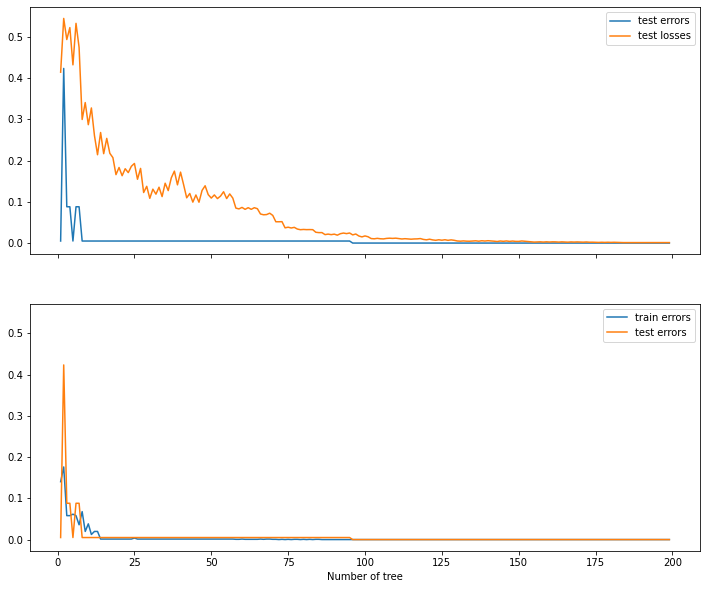

In [4]:
plt.rcParams["figure.figsize"] = (12,10)
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

ax = axs[0]
ax.plot(test_errors, label='test errors')
ax.plot(test_losses, label='test losses')
ax.legend()

ax = axs[1]
ax.plot(train_errors, label='train errors')
ax.plot(test_errors, label='test errors')
ax.legend()

plt.xlabel('Number of tree')
plt.show()

Both Training error and testing error are decreased along the way while the number of trees increased which shows that no overfitting is not here; also testing loss is continued to be improved while the testing error is almost converged.

<a id='seg5'></a>
## <font color='darkblue'>Comparison to Stacking</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241460#questions))
* Let's compare AdaBoost and Stacking
* Both use weighted ensemble of base models

### <font color='darkgreen'>Comparison to Stacking</font>
* Eariler we used squared error for stacking, but we didn't have to
* Using squared error led us to quadratic programming solution. (Because squared error is a quadratic function)
* Now let's just say the loss is "L"
* Could theoretically use gradient descent:
![Exponential Loss2](images/S5_28-1.PNG)
<br/>
* AdaBoost: base classifier if $f_m$ trained with sample weights $W^m$
* Stacking: base classifier is a trained with leave-one-out (<font color='brown'>-i means don't train on sample i</font>)
* How to find model weights? (alphas)
* Regardless of loss function, for stacking, we need to calculate $f_m^-i(..)$
* i.e. we need to know all of these (i=1..N, m=1..M) before optimizing L
* Stored in matrix of size NxM
* \# of models to train is $O(NM)$
* Is quadratic complexity
* Not scalable
* Think in terms of your algorithms class
* what kind of algorithm is AdaBoost? Greedy!
* Doesn't try to optimize all α's at the same time
* Seems suboptimal, but we've already seen that AdaBoost works very well
* Only uses current $W^m$ to find $err_m$ and $α_m$
* Then any earlier params are never changed.
* Using greedy method to train $O(M)$ models which has linear complexity

<a id='seg6'></a>
## <font color='darkblue'>Connection to Deep Learning</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241464#questions))
Similar to random forest, we will make a connection to deep learning:
![Exponential Loss2](images/S5_29-1.PNG)
<br/>
* In other words, a neural network is a network of neurons
* A neuron is logistic regression
![Exponential Loss2](images/S5_29-2.PNG)
<br/>
* We use [tanh](https://en.wikipedia.org/wiki/Hyperbolic_functions) instead of sigmoid to make the output go from -1 to +1
* Key point: each individual hidden unit is like a separate logistic regression.
* Returning to AdaBoost: Recall we don't need to use tree as base learner, we can use logistic regression too (scaled from -1..+1):
![Exponential Loss2](images/S5_29-3.PNG)
<br/>
* AdaBoost (with logistic regression as base learner) has the same structure as a 1-hidden-layer neural network
* Can dynamically expand the size of its "hidden layer".
* As far as the analogy goes
* AdaBoost training is greedy
* Neural network training is global (changes all weights simultaneously)
* Many other models are studied in this context (linear regression, SVM)
* Input features are not raw inputs, but rather functions of those inputs
* Could be manual or automatically engineered features
* Also has the same form:
![Exponential Loss2](images/S5_29-4.PNG)
<br/>

<a id='seg7'></a>
## <font color='darkblue'>Summary and what's next</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6241468#questions)) In this lecture we're going to conclude this course and provide a high level overview of everything you've learned.
* <b>Expected error is a combination of bias, variance, and irreducible error</b>
* We can reduce bias and variance
* Ideal case: both are low
* <font color='darkred'><b>Dilemma: one decreases, the other will increase</b></font>
* Need to optimize test error
* We learned <font color='green'><b>ensemble methods can lower both</b></font>.

### <font color='darkgreen'>Bootstrap</font>
* Estimate confidence intervals
* Reduce variance
![Exponential Loss2](images/S5_30-1.PNG)
<br/>

### <font color='darkgreen'>Bagging</font>
* Use bootstrap samples to train base models
* Combine them into an ensemble
* Use the fact that tree overfit to get low bias and high variance, decorrelation effect
* Combine them to lower variance.


### <font color='darkgreen'>Random Forest</font>
Advanced bagging by randomly select features to build models.

### <font color='darkgreen'>AdaBoost</font>
* Surprisingly did not use low bias, high variance trees. Instead used high bias trees
* Main idea: individual weak learner can combine to be a strong learner if weighted properly
* Demonstrated this works.

### <font color='darkgreen'>Comparison to deep learning</font> 
* Dropout regularization randomly samples features, like random forest
* Emulates ensemple through 1-hidden-layer feedforward neural network which has same structure as AdaBoost with logistic base learner
* AdaBoost performs well even though it does not optimize its parameters globally. (instead it does so greedily)

### <font color='darkgreen'>Beyond boosting</font>
* -1/+1 targets
* What if each model is an expert at different subsets of x?
* "Mixture of Experts":
![Exponential Loss2](images/S5_30-2.PNG)
<br/>

### <font color='darkgreen'>More</font>
* Gradient boosting is also popular
* Great next steps if you want to learn more about ensembles